In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Data preparation

In [2]:
#read job posting datasete into DataFrame.
df = pd.read_csv('datasets/fake_job_postings.csv')
df.head(2)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [3]:
df.info()#summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
df.drop(['job_id','title','location','department','company_profile','description','requirements','benefits'],axis = 1,inplace = True) # drops stated columns
df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...
17875,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,NaN,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [5]:
df.isnull().sum()#number of rows in column that contain null or NaN values  

salary_range           15012
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
df.dropna(inplace=True) # Drop the rows where at least one element is null or NaN
df.reset_index(drop=True,inplace=True,) # Resets the index 
df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,20000-28000,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
1,100000-120000,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
2,120000-150000,0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
3,100000-120000,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
4,50000-65000,0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,0
...,...,...,...,...,...,...,...,...,...,...
2115,0-0,0,1,0,Contract,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
2116,80000-100000,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0
2117,18000-20000,0,1,1,Full-time,Entry level,Bachelor's Degree,Real Estate,Sales,0
2118,18000-19000,0,1,0,Full-time,Entry level,Unspecified,Human Resources,Sales,0


In [7]:
df.isnull().sum()#number of rows in column that contain null or NaN values

salary_range           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [8]:
df.duplicated().sum()#number of duplicate rows 

370

In [9]:
df.drop_duplicates(keep = 'first',inplace=True) # drops duplicate rows and treats first seen instance as the unique record
df.reset_index(drop=True,inplace=True,) # Resets the index 
df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,20000-28000,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
1,100000-120000,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
2,120000-150000,0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
3,100000-120000,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
4,50000-65000,0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,0
...,...,...,...,...,...,...,...,...,...,...
1745,0-30000,0,0,0,Other,Not Applicable,Unspecified,Staffing and Recruiting,Advertising,1
1746,0-0,0,1,0,Contract,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
1747,80000-100000,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0
1748,18000-20000,0,1,1,Full-time,Entry level,Bachelor's Degree,Real Estate,Sales,0


In [10]:
df.duplicated().sum()#number of duplicate rows 

0

In [11]:
df.shape

(1750, 10)

In [12]:
#View the values within the salary_range column and shape of datframe
salary_list = df['salary_range'].tolist()
print (salary_list)
df.shape

['20000-28000', '100000-120000', '120000-150000', '100000-120000', '50000-65000', '40000-50000', '65000-70000', '75-115', '16000-28000', '95000-115000', '15000-18000', '50000-70000', '70000-90000', '10000-14000', '50-110', '28000-45000', '35000-40000', '44000-57000', '18500-28000', '55000-75000', '30000-35000', '20000-40000', '360000-600000', '30000-40000', '80000-100000', '30000-40000', '52000-78000', '30000-40000', '15750-15750', '40000-65000', '30000-37000', '45000-67000', '80000-100000', '180000-216000', '45000-60000', '45000-65000', '70000-90000', '0-1000', '36000-40000', '19000-19000', '60000-120000', '120000-15000000', '42000-55000', '90000-120000', '55000-75000', '10000-14000', '30000-40000', '1600-1700', '30000-70000', '32000-40000', '50-100', '0-0', '45000-67000', '9000-17000', '23040-28800', '105-110', '80000-110000', '100000-180000', '45000-55000', '25000-42000', '40000-60000', '600000-750000', '120000-170000', '45000-90000', '70000-90000', '25000-30000', '55000-75000', '65

(1750, 10)

In [13]:
#drop rows that contain dates in the salary_range column
df2 = df[df.salary_range.str.contains("jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec",case=False) == False]

In [14]:
df2.shape

(1735, 10)

In [15]:
df = df2 # making df2 the main dataframe to be used 
df.reset_index(drop=True,inplace=True,) # Resets the index 
df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,20000-28000,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
1,100000-120000,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
2,120000-150000,0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
3,100000-120000,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
4,50000-65000,0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,0
...,...,...,...,...,...,...,...,...,...,...
1730,0-30000,0,0,0,Other,Not Applicable,Unspecified,Staffing and Recruiting,Advertising,1
1731,0-0,0,1,0,Contract,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
1732,80000-100000,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0
1733,18000-20000,0,1,1,Full-time,Entry level,Bachelor's Degree,Real Estate,Sales,0


In [16]:
df.nunique()# number of unique values within each colum

salary_range           692
telecommuting            2
has_company_logo         2
has_questions            2
employment_type          5
required_experience      7
required_education      13
industry               111
function                37
fraudulent               2
dtype: int64

In [17]:
#One Hot Encoding chosen categorical features and creating a new dataframe for encoded variables 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',dtype=np.int) 
dfn = df[['salary_range','employment_type','required_experience','required_education','industry','function']] 
dfn = encoder.fit_transform(dfn).toarray() 
dfn = pd.DataFrame(dfn,columns=encoder.get_feature_names())
dfn

,x0_0-1,x0_0-1000,x0_0-100000,x0_0-110406,x0_0-115,x0_0-130000,x0_0-15000,x0_0-150000,x0_0-16000,x0_0-25000,...,x5_Public Relations,x5_Purchasing,x5_Quality Assurance,x5_Research,x5_Sales,x5_Science,x5_Strategy/Planning,x5_Supply Chain,x5_Training,x5_Writing/Editing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
df = pd.concat([df,dfn],axis=1) # concat encoded columns to the dataframe
df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,...,x5_Public Relations,x5_Purchasing,x5_Quality Assurance,x5_Research,x5_Sales,x5_Science,x5_Strategy/Planning,x5_Supply Chain,x5_Training,x5_Writing/Editing
0,20000-28000,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,...,0,0,0,0,0,0,0,0,0,0
1,100000-120000,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,...,0,0,0,0,0,0,0,0,0,0
2,120000-150000,0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0,...,0,0,0,0,1,0,0,0,0,0
3,100000-120000,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0,...,0,0,0,0,1,0,0,0,0,0
4,50000-65000,0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,0-30000,0,0,0,Other,Not Applicable,Unspecified,Staffing and Recruiting,Advertising,1,...,0,0,0,0,0,0,0,0,0,0
1731,0-0,0,1,0,Contract,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,...,0,0,0,0,0,0,0,0,0,0
1732,80000-100000,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0,...,0,0,0,0,0,0,0,0,0,0
1733,18000-20000,0,1,1,Full-time,Entry level,Bachelor's Degree,Real Estate,Sales,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
#dropping the non encoded columns from the dataframe 
df.drop(['salary_range','employment_type','required_experience','required_education','industry','function'],inplace = True, axis = 1)
df

,telecommuting,has_company_logo,has_questions,fraudulent,x0_0-1,x0_0-1000,x0_0-100000,x0_0-110406,x0_0-115,x0_0-130000,...,x5_Public Relations,x5_Purchasing,x5_Quality Assurance,x5_Research,x5_Sales,x5_Science,x5_Strategy/Planning,x5_Supply Chain,x5_Training,x5_Writing/Editing
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1731,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1732,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1733,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
#setting x,y axises
X = df.drop(['fraudulent'],axis = 1)
y = df['fraudulent']


In [21]:
#Converting 800+ Dimension feature space  into 2D PCA and creating a dataframe based on the 2D PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pComponent = pca.fit_transform(X)
pcdf = pd.DataFrame(data = pComponent,columns = ['pc1','pc2'])
pcdf = pd.concat([pcdf,df['fraudulent']],axis =1)
pcdf

,pc1,pc2,fraudulent
0,0.162618,-0.197660,0
1,1.093985,1.129210,0
2,0.235221,-0.740579,0
3,-0.634949,0.306676,0
4,-0.462734,0.382725,0
...,...,...,...
1730,-0.915899,1.079453,1
1731,1.095640,0.734616,0
1732,0.772975,0.265586,0
1733,-0.061640,-0.889382,0


In [22]:
#information lost whilst converting into PCA
pca.explained_variance_ratio_ # total = 0.16% so lost information is 99.84% 

array([0.09557941, 0.06315747])

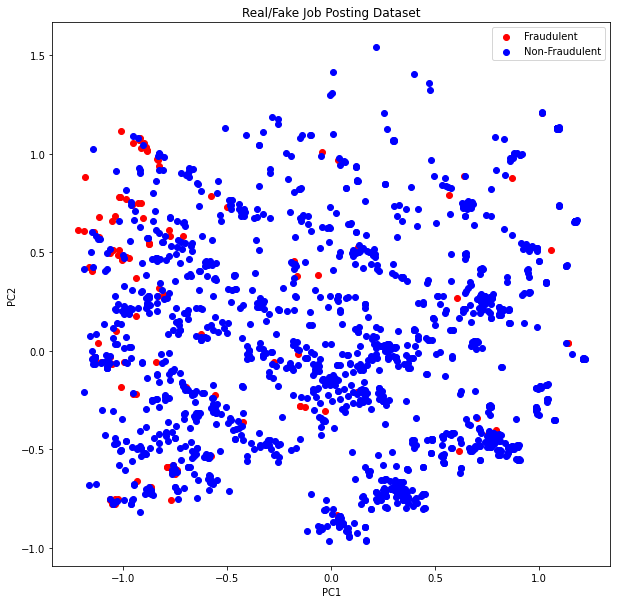

In [23]:
#2D PCA plotting
fig = plt.figure(figsize=(10, 10))
plt.title('Real/Fake Job Posting Dataset')
plt.xlabel("PC1")
plt.ylabel("PC2")

fraud1 = pcdf[pcdf['fraudulent'] == 1]
fraud0 = pcdf[pcdf['fraudulent'] == 0]
pla = plt.scatter(fraud1.pc1, fraud1.pc2, color='red')
plb = plt.scatter(fraud0.pc1, fraud0.pc2, color='blue')

plt.legend([pla, plb], ["Fraudulent", "Non-Fraudulent"])

In [24]:
#splitting data for training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)

## Logistic Regression Model

### Default model creation and evaluation

In [25]:
%%time
#Default logisitic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
print ("Training Model score:{:.3f}".format(training_score))
testing_score = model.score(X_test,y_test)
print ("Testing Model score:{:.3f}".format(testing_score))

Training Model score:0.956
Testing Model score:0.928
Wall time: 224 ms


In [26]:
#Cross validation of default logisitc regression model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv =4,scoring = 'accuracy')
print(scores)
avg_scores = scores.mean()
print("Average model performance : {:.3f}".format(avg_scores))

[0.91935484 0.92396313 0.92626728 0.93764434]
Average model performance : 0.927


In [27]:
#Confusion matrix for default logistic regression model
y_test_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
print(cfm)

[[320   1]
 [ 24   2]]


[Text(0, 0.5, 'Non-Fraudulent'), Text(0, 1.5, 'Fraudulent')]

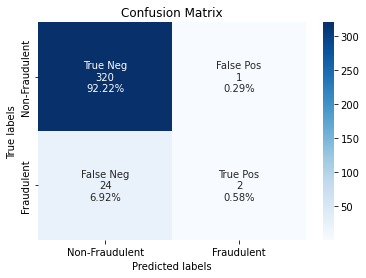

In [28]:
#Confusion matrix visualisation for default logisitic regression model 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cfm,ax=ax,annot=labels, fmt='', cmap='Blues',)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
ax.yaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])

In [29]:
#Classification report for default logistic regression model
from sklearn.metrics import classification_report
target_names = ['Non-Fraudulent','Fraudulent']
cReport = classification_report(y_test,y_test_pred,target_names = target_names)
print(cReport)

                precision    recall  f1-score   support

Non-Fraudulent       0.93      1.00      0.96       321
    Fraudulent       0.67      0.08      0.14        26

      accuracy                           0.93       347
     macro avg       0.80      0.54      0.55       347
  weighted avg       0.91      0.93      0.90       347



### Default model creation with Oversampled training data + evaluation

In [30]:
#Oversampling training data
from imblearn.over_sampling import SMOTE
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [31]:
y_train.value_counts()# number of classifications before oversampling 


0    1285
1     103
Name: fraudulent, dtype: int64

In [32]:
y_train_smote.value_counts()# number of classifications after oversampling 

0    1285
1    1285
Name: fraudulent, dtype: int64

In [33]:
%%time
#Default logisitic regression model after oversampling
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train_smote,y_train_smote)
training_score = model.score(X_train_smote,y_train_smote)
print ("Training Model score:{:.3f}".format(training_score))
testing_score = model.score(X_test,y_test)
print ("Testing Model score:{:.3f}".format(testing_score))

Training Model score:0.953
Testing Model score:0.908
Wall time: 393 ms


In [34]:
#Cross validation of Default logisitc regression model after oversampling
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv =4,scoring = 'accuracy')
print(scores)
avg_scores = scores.mean()
print("Average model performance : {:.3f}".format(avg_scores))

[0.91935484 0.92396313 0.92626728 0.93764434]
Average model performance : 0.927


In [35]:
#Confusion matrix for default logistic regression model after oversampling
y_test_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
print(cfm)

[[298  23]
 [  9  17]]


[Text(0, 0.5, 'Non-Fraudulent'), Text(0, 1.5, 'Fraudulent')]

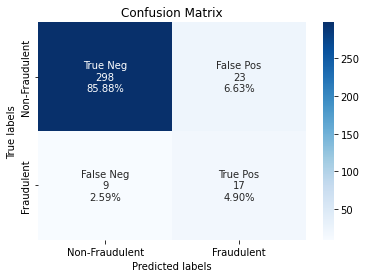

In [36]:
#Confusion matrix visualisation for default logisitic regression model after oversampling
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cfm,ax=ax,annot=labels, fmt='', cmap='Blues',)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
ax.yaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])

In [37]:
#Classification report for default logisitic regression model after oversampling
from sklearn.metrics import classification_report
target_names = ['Non-Fraudulent','Fraudulent']
cReport = classification_report(y_test,y_test_pred,target_names = target_names)
print(cReport)

                precision    recall  f1-score   support

Non-Fraudulent       0.97      0.93      0.95       321
    Fraudulent       0.42      0.65      0.52        26

      accuracy                           0.91       347
     macro avg       0.70      0.79      0.73       347
  weighted avg       0.93      0.91      0.92       347



### Grid Search and Random Search Finding Optimal Hyperparameters

In [38]:
#Classifier hyperparameters as with their values as lists
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty_list = ['l1','l2','elasticent','none']
c_list = [0.001,0.01,0.1,1,10,100,1000]

para_dict = dict(penalty=penalty_list,C =c_list,solver=solver_list) #dictionary of the hyperparamters and their values  
print(para_dict)

{'penalty': ['l1', 'l2', 'elasticent', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


In [39]:
%%time
#Random search
from sklearn.model_selection import RandomizedSearchCV
rand = RandomizedSearchCV(model,para_dict,cv=5,scoring = 'accuracy',return_train_score=False,n_iter = 10,random_state=0)
rand.fit(X_train_smote,y_train_smote)

Wall time: 18.8 s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2', 'elasticent',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=0, scoring='accuracy')

In [40]:
pd.DataFrame(rand.cv_results_)[['mean_test_score','params']] # convert random search results to data frame and showing only the wanted columns

,mean_test_score,params
0,0.891440,"{'solver': 'newton-cg', 'penalty': 'l2', 'C': ..."
1,0.939689,"{'solver': 'saga', 'penalty': 'none', 'C': 0.1}"
2,0.813619,"{'solver': 'liblinear', 'penalty': 'l2', 'C': ..."
3,NaN,"{'solver': 'newton-cg', 'penalty': 'elasticent..."
4,NaN,"{'solver': 'liblinear', 'penalty': 'elasticent..."
5,0.848249,"{'solver': 'liblinear', 'penalty': 'l2', 'C': ..."
6,NaN,"{'solver': 'lbfgs', 'penalty': 'elasticent', '..."
7,NaN,"{'solver': 'liblinear', 'penalty': 'none', 'C'..."
8,0.894942,"{'solver': 'liblinear', 'penalty': 'l1', 'C': ..."
9,0.801556,"{'solver': 'sag', 'penalty': 'l2', 'C': 0.001}"


In [41]:
#Shows the hyperparamters that give the best average model accuracy 
print ("Best model accuracy is :{:.3f}".format(rand.best_score_))
print ("Best set of hyperparamters are:",rand.best_params_)

Best model accuracy is :0.940
Best set of hyperparamters are: {'solver': 'saga', 'penalty': 'none', 'C': 0.1}


In [42]:
%%time 
#Grid search
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,para_dict,cv=5,scoring = 'accuracy',return_train_score=False)
grid.fit(X_train_smote,y_train_smote)

Wall time: 6min 45s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticent', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [43]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','params']] # convert grid search results to data frame and showing only the wanted columns


,mean_test_score,params
0,NaN,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto..."
1,NaN,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}"
2,0.500000,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli..."
3,NaN,"{'C': 0.001, 'penalty': 'l1', 'solver': 'sag'}"
4,0.500000,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}"
...,...,...
135,0.880156,"{'C': 1000, 'penalty': 'none', 'solver': 'newt..."
136,0.918677,"{'C': 1000, 'penalty': 'none', 'solver': 'lbfgs'}"
137,NaN,"{'C': 1000, 'penalty': 'none', 'solver': 'libl..."
138,0.937743,"{'C': 1000, 'penalty': 'none', 'solver': 'sag'}"


In [44]:
#Shows the hyperparamters that give the best average model accuracy 
print ("Best model accuracy is :{:.3f}".format(grid.best_score_))
print ("Best set of hyperparamters are:",grid.best_params_)

Best model accuracy is :0.940
Best set of hyperparamters are: {'C': 0.001, 'penalty': 'none', 'solver': 'saga'}


### Tuned model with Random Search Parameters and Oversampled training data + evaluation

In [45]:
#Get the values of the for the optimal hyperparamters
rs_optimal_solver = rand.best_params_.get('solver')
rs_optimal_C = rand.best_params_.get('C')
rs_optimal_penalty = rand.best_params_.get('penalty')

In [46]:
%%time
#logisitic regression model after oversampling and random search
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=rs_optimal_penalty,C=rs_optimal_C,solver=rs_optimal_solver,random_state=0)
model.fit(X_train_smote,y_train_smote)
training_score = model.score(X_train_smote,y_train_smote)
print ("Training Model score:{:.3f}".format(training_score))
testing_score = model.score(X_test,y_test)
print ("Testing Model score:{:.3f}".format(testing_score))

Training Model score:0.989
Testing Model score:0.916
Wall time: 2.35 s


In [47]:
#Cross validation of logisitc regression model after oversampling and random search
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv =4,scoring = 'accuracy')
print(scores)
avg_scores = scores.mean()
print("Average model performance : {:.3f}".format(avg_scores))

[0.89861751 0.9078341  0.93087558 0.93533487]
Average model performance : 0.918


In [48]:
#Confusion matrix for logisitic regression model after oversampling and random search
y_test_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
print(cfm)

[[300  21]
 [  8  18]]


[Text(0, 0.5, 'Non-Fraudulent'), Text(0, 1.5, 'Fraudulent')]

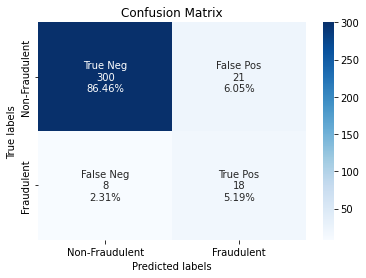

In [49]:
#Confusion matrix visualisation for logisitic regression model after oversampling and random search
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cfm,ax=ax,annot=labels, fmt='', cmap='Blues',)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
ax.yaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])

In [50]:
#Classification report for logisitic regression model after oversampling and random search
from sklearn.metrics import classification_report
target_names = ['Non-Fraudulent','Fraudulent']
cReport = classification_report(y_test,y_test_pred,target_names = target_names)
print(cReport)

                precision    recall  f1-score   support

Non-Fraudulent       0.97      0.93      0.95       321
    Fraudulent       0.46      0.69      0.55        26

      accuracy                           0.92       347
     macro avg       0.72      0.81      0.75       347
  weighted avg       0.94      0.92      0.92       347



## MLPC Model

### Default model creation and evaluation

In [51]:
%%time
#Default MLPC model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0)
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
print ("Training Model score:{:.3f}".format(training_score))
testing_score = model.score(X_test,y_test)
print ("Testing Model score:{:.3f}".format(testing_score))

Training Model score:0.999
Testing Model score:0.937
Wall time: 6.31 s


In [52]:
#Cross validation of default MLPC model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv =4,scoring = 'accuracy')
print(scores)
avg_scores = scores.mean()
print("Average model performance : {:.3f}".format(avg_scores))

[0.91935484 0.91705069 0.93087558 0.94226328]
Average model performance : 0.927


In [53]:
#Confusion matrix for default MLPC model
y_test_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
print(cfm)

[[314   7]
 [ 15  11]]


[Text(0, 0.5, 'Non-Fraudulent'), Text(0, 1.5, 'Fraudulent')]

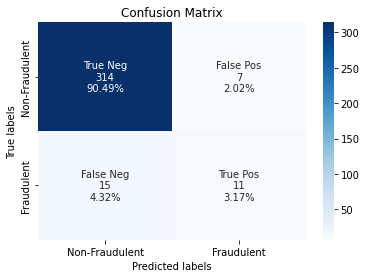

In [54]:
#Confusion matrix visualisation for default MLPC model 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cfm,ax=ax,annot=labels, fmt='', cmap='Blues',)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
ax.yaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])

In [55]:
#Classification report for default MLPC model
from sklearn.metrics import classification_report
target_names = ['Non-Fraudulent','Fraudulent']
cReport = classification_report(y_test,y_test_pred,target_names = target_names)
print(cReport)

                precision    recall  f1-score   support

Non-Fraudulent       0.95      0.98      0.97       321
    Fraudulent       0.61      0.42      0.50        26

      accuracy                           0.94       347
     macro avg       0.78      0.70      0.73       347
  weighted avg       0.93      0.94      0.93       347



### Default model creation with Oversampled training data + evaluation

In [56]:
#Oversampling training data
from imblearn.over_sampling import SMOTE
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [57]:
y_train.value_counts()# number of classifications before oversampling 


0    1285
1     103
Name: fraudulent, dtype: int64

In [58]:
y_train_smote.value_counts()# number of classifications after oversampling 

0    1285
1    1285
Name: fraudulent, dtype: int64

In [59]:
%%time
#Default MLPC model after oversampling
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0)
model.fit(X_train_smote,y_train_smote)
training_score = model.score(X_train_smote,y_train_smote)
print ("Training Model score:{:.3f}".format(training_score))
testing_score = model.score(X_test,y_test)
print ("Testing Model score:{:.3f}".format(testing_score))

Training Model score:1.000
Testing Model score:0.914
Wall time: 12.7 s


In [60]:
#Cross validation of Default MLPC model after oversampling
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv =4,scoring = 'accuracy')
print(scores)
avg_scores = scores.mean()
print("Average model performance : {:.3f}".format(avg_scores))

[0.91935484 0.91705069 0.93087558 0.94226328]
Average model performance : 0.927


In [61]:
#Confusion matrix for default MLPC model after oversampling
y_test_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
print(cfm)

[[297  24]
 [  6  20]]


[Text(0, 0.5, 'Non-Fraudulent'), Text(0, 1.5, 'Fraudulent')]

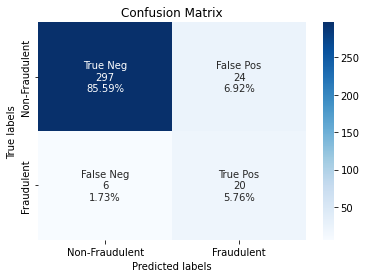

In [62]:
#Confusion matrix visualisation for default MLPC model after oversampling
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cfm,ax=ax,annot=labels, fmt='', cmap='Blues',)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
ax.yaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])

In [63]:
#Classification report for default MLPC model after oversampling
from sklearn.metrics import classification_report
target_names = ['Non-Fraudulent','Fraudulent']
cReport = classification_report(y_test,y_test_pred,target_names = target_names)
print(cReport)

                precision    recall  f1-score   support

Non-Fraudulent       0.98      0.93      0.95       321
    Fraudulent       0.45      0.77      0.57        26

      accuracy                           0.91       347
     macro avg       0.72      0.85      0.76       347
  weighted avg       0.94      0.91      0.92       347



### Grid Search and Random Search Finding Optimal Hyperparameters

In [64]:
#Classifier hyperparameters as with their values as lists
hidden_layer_sizes_list = [(100,),(100,50,),(100,50,25,),(100,50,25,12,),(100,50,25,12,6,)]
activation_list = ['identity', 'logistic', 'tanh', 'relu']
solver_list = ['lbfgs', 'sgd', 'adam']
learning_rate_list = ['constant','invscaling','adaptive']

para_dict = dict(hidden_layer_sizes=hidden_layer_sizes_list,activation=activation_list,solver=solver_list,learning_rate=learning_rate_list) #dictionary of the hyperparamters and their values  
print(para_dict)

{'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 25), (100, 50, 25, 12), (100, 50, 25, 12, 6)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'learning_rate': ['constant', 'invscaling', 'adaptive']}


In [65]:
%%time
#Random search
from sklearn.model_selection import RandomizedSearchCV
rand = RandomizedSearchCV(model,para_dict,cv=5,scoring = 'accuracy',return_train_score=False,n_iter = 10,random_state=0)
rand.fit(X_train_smote,y_train_smote)

Wall time: 8min 32s


RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=0),
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (100, 50),
                                                               (100, 50, 25),
                                                               (100, 50, 25,
                                                                12),
                                                               (100, 50, 25, 12,
                                                                6)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': [

In [66]:
pd.DataFrame(rand.cv_results_)[['mean_test_score','params']] # convert random search results to data frame and showing only the wanted columns

,mean_test_score,params
0,0.903113,"{'solver': 'sgd', 'learning_rate': 'adaptive',..."
1,0.864202,"{'solver': 'sgd', 'learning_rate': 'adaptive',..."
2,0.918677,"{'solver': 'adam', 'learning_rate': 'adaptive'..."
3,0.930739,"{'solver': 'sgd', 'learning_rate': 'adaptive',..."
4,0.863813,"{'solver': 'sgd', 'learning_rate': 'constant',..."
5,0.927237,"{'solver': 'adam', 'learning_rate': 'adaptive'..."
6,0.924903,"{'solver': 'adam', 'learning_rate': 'constant'..."
7,0.906226,"{'solver': 'sgd', 'learning_rate': 'adaptive',..."
8,0.952918,"{'solver': 'lbfgs', 'learning_rate': 'constant..."
9,0.952918,"{'solver': 'lbfgs', 'learning_rate': 'constant..."


In [67]:
#Shows the hyperparamters that give the best average model accuracy 
print ("Best model accuracy is :{:.3f}".format(rand.best_score_))
print ("Best set of hyperparamters are:",rand.best_params_)

Best model accuracy is :0.953
Best set of hyperparamters are: {'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50, 25, 12), 'activation': 'relu'}


In [68]:
%%time
#Grid search
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,para_dict,cv=5,scoring = 'accuracy',return_train_score=False)
grid.fit(X_train_smote,y_train_smote)

Wall time: 1h 32min 37s


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (100, 50),
                                                (100, 50, 25),
                                                (100, 50, 25, 12),
                                                (100, 50, 25, 12, 6)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy')

In [69]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','params']] # convert grid search results to data frame and showing only the wanted columns

,mean_test_score,params
0,0.917121,"{'activation': 'identity', 'hidden_layer_sizes..."
1,0.864202,"{'activation': 'identity', 'hidden_layer_sizes..."
2,0.916732,"{'activation': 'identity', 'hidden_layer_sizes..."
3,0.917121,"{'activation': 'identity', 'hidden_layer_sizes..."
4,0.542023,"{'activation': 'identity', 'hidden_layer_sizes..."
...,...,...
175,0.500000,"{'activation': 'relu', 'hidden_layer_sizes': (..."
176,0.950973,"{'activation': 'relu', 'hidden_layer_sizes': (..."
177,0.943969,"{'activation': 'relu', 'hidden_layer_sizes': (..."
178,0.947471,"{'activation': 'relu', 'hidden_layer_sizes': (..."


In [70]:
#Shows the hyperparamters that give the best average model accuracy 
print ("Best model accuracy is :{:.3f}".format(grid.best_score_))
print ("Best set of hyperparamters are:",grid.best_params_)

Best model accuracy is :0.957
Best set of hyperparamters are: {'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'lbfgs'}


### Tuned model with Random Search Parameters and Oversampled training data + evaluation

In [71]:
#Get the values of the for the optimal hyperparamters
rs_optimal_hidden_layer_sizes = rand.best_params_.get('hidden_layer_sizes')
rs_optimal_activation = rand.best_params_.get('activation')
rs_optimal_solver = rand.best_params_.get('solver')
rs_optimal_learning_rate = rand.best_params_.get('learning_rate')

In [72]:
%%time
#MLPC model after oversampling and random  search
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=rs_optimal_hidden_layer_sizes,activation=rs_optimal_activation,solver=rs_optimal_solver,learning_rate=rs_optimal_learning_rate,
random_state=0)
model.fit(X_train_smote,y_train_smote)
training_score = model.score(X_train_smote,y_train_smote)
print ("Training Model score:{:.3f}".format(training_score))
testing_score = model.score(X_test,y_test)
print ("Testing Model score:{:.3f}".format(testing_score))

Training Model score:1.000
Testing Model score:0.934
Wall time: 4.07 s


In [73]:
#Cross validation of MLPC model after oversampling and random search
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv =4,scoring = 'accuracy')
print(scores)
avg_scores = scores.mean()
print("Average model performance : {:.3f}".format(avg_scores))

[0.89861751 0.9124424  0.93087558 0.94457275]
Average model performance : 0.922


In [74]:
#Confusion matrix for MLPC model after oversampling and random search
y_test_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
print(cfm)

[[308  13]
 [ 10  16]]


[Text(0, 0.5, 'Non-Fraudulent'), Text(0, 1.5, 'Fraudulent')]

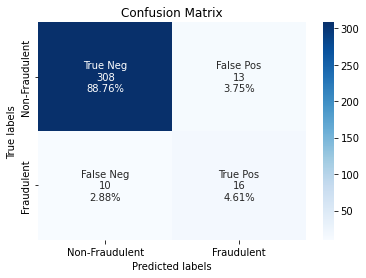

In [75]:
#Confusion matrix visualisation for MLPC model after oversampling and random search
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cfm,ax=ax,annot=labels, fmt='', cmap='Blues',)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
ax.yaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])

In [76]:
#Classification report for MLPC model after oversampling and random search
from sklearn.metrics import classification_report
target_names = ['Non-Fraudulent','Fraudulent']
cReport = classification_report(y_test,y_test_pred,target_names = target_names)
print(cReport)

                precision    recall  f1-score   support

Non-Fraudulent       0.97      0.96      0.96       321
    Fraudulent       0.55      0.62      0.58        26

      accuracy                           0.93       347
     macro avg       0.76      0.79      0.77       347
  weighted avg       0.94      0.93      0.94       347

